# Traffic Accidents Analysis Project

## 1.6 MILLION UK TRAFFIC ACCIDENTS
---
**Dataset Link:** https://www.kaggle.com/daveianhickey/2000-16-traffic-flow-england-scotland-wales

---

### Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Reading CSV(Comma-Separated Values) File 

In [2]:
data_2005to2007 = pd.read_csv("accidents_2005_to_2007.csv",low_memory=False)
data_2009to2011 = pd.read_csv("accidents_2009_to_2011.csv",low_memory=False)
data_2012to2014 = pd.read_csv("accidents_2012_to_2014.csv",low_memory=False)

In [3]:
for i in [data_2005to2007, data_2009to2011, data_2012to2014]:
    print(f"Number of Row :{i.shape[0]}, Number of Column :{i.shape[1]} \n")

Number of Row :570011, Number of Column :33 

Number of Row :469442, Number of Column :33 

Number of Row :464697, Number of Column :33 



### Separate DataFrames Concatenate

In [4]:
data = pd.concat([data_2005to2007,data_2009to2011,data_2012to2014],axis=0)
data

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,E01002849,2005
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002909,2005
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002857,2005
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002840,2005
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,...,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,Yes,E01002863,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464692,2.01E+12,310037.0,597647.0,-3.417278,55.264773,98,2,2,1,07/12/2014,...,No physical crossing within 50 meters,Darkeness: No street lighting,Snowing without high winds,Snow,None,None,2,Yes,NaN,2014
464693,2.01E+12,321509.0,574063.0,-3.230255,55.054855,98,3,2,2,11/12/2014,...,No physical crossing within 50 meters,Darkeness: No street lighting,Fine without high winds,Snow,None,None,2,Yes,NaN,2014
464694,2.01E+12,321337.0,566365.0,-3.230826,54.985668,98,3,1,1,09/12/2014,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Frost/Ice,None,None,2,Yes,NaN,2014
464695,2.01E+12,323869.0,566853.0,-3.191397,54.990446,98,2,3,2,17/12/2014,...,No physical crossing within 50 meters,Darkeness: No street lighting,Raining without high winds,Wet/Damp,None,None,2,Yes,NaN,2014


In [5]:
print(f"Number of Row:{data.shape[0]}, Number of Column:{data.shape[1]} for data")

Number of Row:1504150, Number of Column:33 for data


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1504150 entries, 0 to 464696
Data columns (total 33 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Accident_Index                               1504150 non-null  object 
 1   Location_Easting_OSGR                        1504049 non-null  float64
 2   Location_Northing_OSGR                       1504049 non-null  float64
 3   Longitude                                    1504049 non-null  float64
 4   Latitude                                     1504049 non-null  float64
 5   Police_Force                                 1504150 non-null  int64  
 6   Accident_Severity                            1504150 non-null  int64  
 7   Number_of_Vehicles                           1504150 non-null  int64  
 8   Number_of_Casualties                         1504150 non-null  int64  
 9   Date                                         15

### Dropping Unused Columns

In [7]:
edited_data = data.drop(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR','Longitude',
       'Latitude', 'Police_Force','Date','Local_Authority_(District)', 'Time','Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Speed_limit','Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control', 'Pedestrian_Crossing-Physical_Facilities', 
       'Light_Conditions','Special_Conditions_at_Site', 'Carriageway_Hazards','Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location'], axis=1)
edited_data.columns

Index(['Accident_Severity', 'Number_of_Vehicles', 'Number_of_Casualties',
       'Day_of_Week', 'Road_Type', 'Weather_Conditions',
       'Road_Surface_Conditions', 'Urban_or_Rural_Area', 'Year'],
      dtype='object')

### Data Cleaning

In [8]:
edited_data.isnull().sum()

Accident_Severity             0
Number_of_Vehicles            0
Number_of_Casualties          0
Day_of_Week                   0
Road_Type                     0
Weather_Conditions          126
Road_Surface_Conditions    1958
Urban_or_Rural_Area           0
Year                          0
dtype: int64

In [9]:
edited_data.dropna(inplace=True)
edited_data.isnull().sum()

Accident_Severity          0
Number_of_Vehicles         0
Number_of_Casualties       0
Day_of_Week                0
Road_Type                  0
Weather_Conditions         0
Road_Surface_Conditions    0
Urban_or_Rural_Area        0
Year                       0
dtype: int64

In [10]:
print(f"Number of Row :{edited_data.shape[0]}, Number of Column :{edited_data.shape[1]} for edited data")

Number of Row :1502070, Number of Column :9 for edited data


---
# Traffic Accidents Analysis

### Number of Traffic Accidents Gradually Dropped By years

In [11]:
num_of_acc = edited_data["Year"].value_counts() 
num_of_acc

2005    198502
2006    188930
2007    181901
2012    179441
2009    163351
2010    154192
2011    151252
2014    146100
2013    138401
Name: Year, dtype: int64

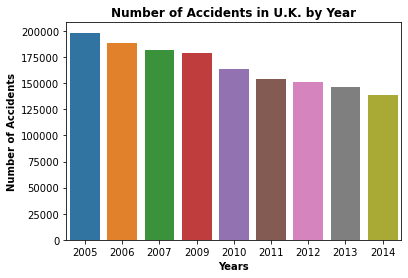

In [12]:
years_arr = edited_data["Year"].unique()
num_acc_arr = num_of_acc.values

sns.barplot(x = years_arr, y = num_acc_arr)
plt.ylabel("Number of Accidents",weight="bold")
plt.xlabel("Years",weight="bold")
plt.title("Number of Accidents in U.K. by Year",weight="bold")
plt.show()

### How Do Weather Events Impact Roads?

In [13]:
road_cond = edited_data["Road_Surface_Conditions"].value_counts() #Accident Rate by Road Conditions
road_cond

Dry                          1034568
Wet/Damp                      423460
Frost/Ice                      31402
Snow                           10497
Flood (Over 3cm of water)       2143
Name: Road_Surface_Conditions, dtype: int64

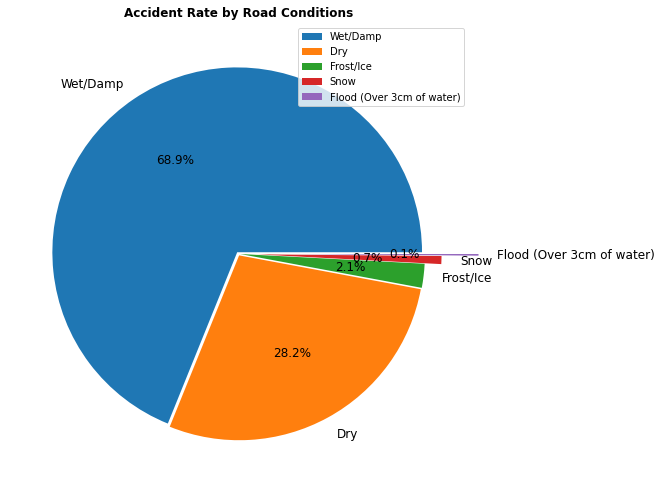

In [14]:
road_cond_arr = edited_data["Road_Surface_Conditions"].unique()
road_num_acc_arr = road_cond.values

plt.figure(figsize = (8.5,8.5))
plt.pie(road_num_acc_arr, labels = road_cond_arr,colors = sns.color_palette(),textprops={'size': 'large'},explode=(0.01,0.01,0.01,0.1,0.3),autopct="%1.1f%%")
plt.legend(loc="upper right")
plt.title("Accident Rate by Road Conditions",weight="bold")
plt.show()

### What Weather Conditions Cause the Most Traffic Accidents?

In [15]:
weather_cond = edited_data["Weather_Conditions"].value_counts() #Accident Rate by Weather Conditions
weather_cond

Fine without high winds       1203589
Raining without high winds     177651
Other                           33441
Unknown                         26783
Raining with high winds         20812
Fine with high winds            18348
Snowing without high winds      11300
Fog or mist                      8186
Snowing with high winds          1960
Name: Weather_Conditions, dtype: int64

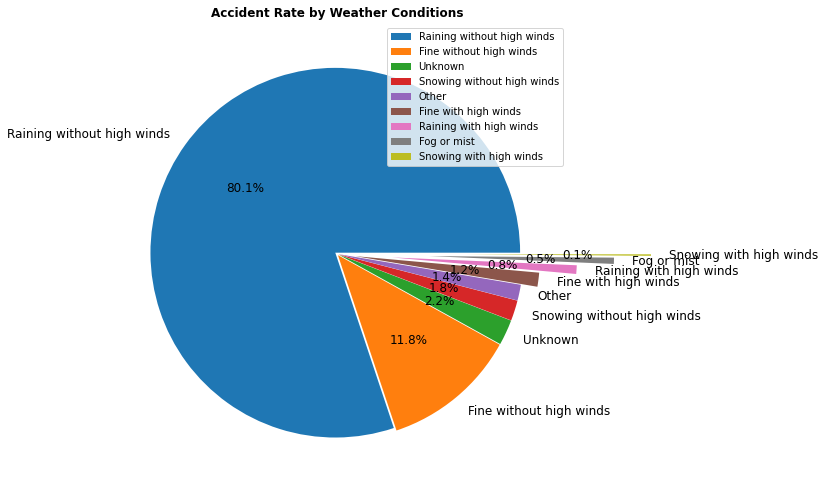

In [16]:
weather_cond_arr = edited_data["Weather_Conditions"].unique()
weather_num_acc_arr = weather_cond.values

plt.figure(figsize = (8.5,8.5))
plt.pie(weather_num_acc_arr, labels = weather_cond_arr,colors = sns.color_palette(),textprops={'size': 'large'},
        explode=(0.01,0.01,0.01,0.01,0.01,0.10,0.30,0.50,0.7),autopct="%1.1f%%")
plt.legend(loc="upper right")
plt.title("Accident Rate by Weather Conditions",weight="bold")
plt.show()

### Number of Casualties by Road Type in Traffic Accidents

In [17]:
edited_data.groupby(['Road_Type'])["Number_of_Casualties"].sum()

Road_Type
Dual carriageway       328601
One way street          36875
Roundabout             126376
Single carriageway    1505073
Slip road               22185
Unknown                 10369
Name: Number_of_Casualties, dtype: int64

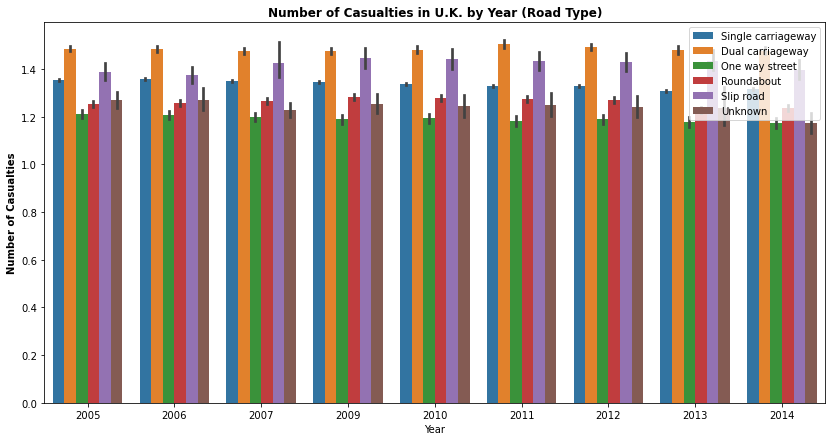

In [18]:
plt.figure(figsize = (14,7))
sns.barplot(x="Year",y="Number_of_Casualties",data=edited_data,hue="Road_Type")
plt.title("Number of Casualties in U.K. by Year (Road Type)",weight="bold")
plt.ylabel("Number of Casualties",weight="bold")
plt.legend(loc="upper right")
plt.show()  

### Average Number of Vehicles and Number of Casualties  by year

In [19]:
edited_data.groupby(['Year'])[['Number_of_Vehicles','Number_of_Casualties']].mean()

,Number_of_Vehicles,Number_of_Casualties
Year,,
2005,1.842843,1.363780
2006,1.840057,1.366231
2007,1.839391,1.360795
2009,1.826276,1.358333
2010,1.822507,1.351309
2011,1.823189,1.346627
2012,1.825480,1.346398
2013,1.824185,1.324911
2014,1.835359,1.329363


### What kind of a relationship is there between the Number of Vehicles and the Number of Casualties in traffic accidents?

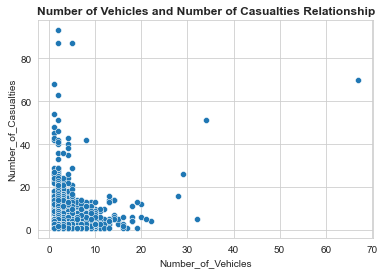

In [20]:
sns.set_style("whitegrid")
sns.scatterplot(x="Number_of_Vehicles",y="Number_of_Casualties",data=edited_data)
plt.title("Number of Vehicles and Number of Casualties Relationship",weight="bold")
plt.show()

### Which Day of the Week Has the Most Traffic Accidents?

In [21]:
edited_data["Day_of_Week"].value_counts()

6    246790
5    226122
4    226033
3    223786
2    213438
7    201139
1    164762
Name: Day_of_Week, dtype: int64

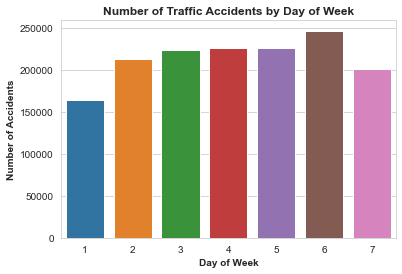

In [22]:
sns.countplot(x="Day_of_Week",data=edited_data)
plt.ylabel("Number of Accidents",weight="bold")
plt.xlabel("Day of Week",weight="bold")
plt.title("Number of Traffic Accidents by Day of Week",weight="bold")
plt.show()

### What is the Difference Between Urban and Rural Area Traffic Accidents Risks?

In [23]:
edited_data["Urban_or_Rural_Area"].value_counts()

1    970701
2    531238
3       131
Name: Urban_or_Rural_Area, dtype: int64

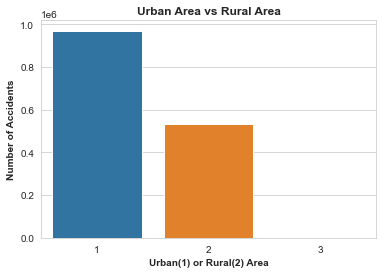

In [24]:
sns.countplot(x="Urban_or_Rural_Area",data=edited_data)
plt.ylabel("Number of Accidents",weight="bold")
plt.xlabel("Urban(1) or Rural(2) Area",weight="bold")
plt.title("Urban Area vs Rural Area",weight="bold")
plt.show()

### What kind of a relationship is there between the Accident Severity and the Number of Casualties in traffic accidents?

In [25]:
edited_data["Urban_or_Rural_Area"].value_counts()

1    970701
2    531238
3       131
Name: Urban_or_Rural_Area, dtype: int64

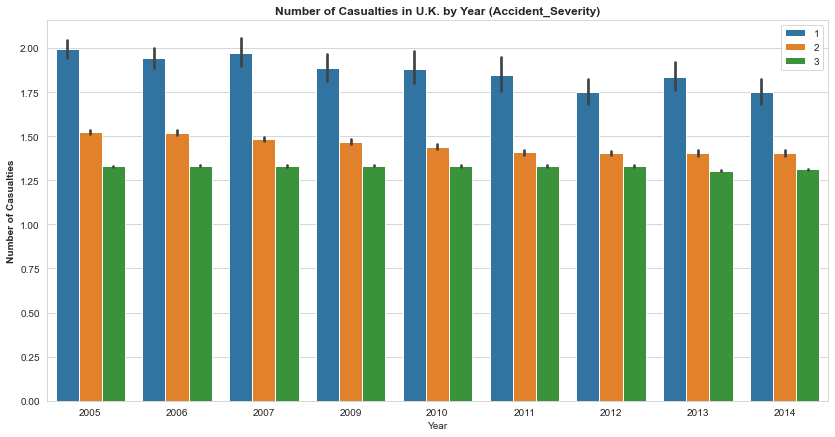

In [26]:
plt.figure(figsize = (14,7))
sns.barplot(x="Year",y="Number_of_Casualties",data=edited_data,hue="Accident_Severity")
plt.title("Number of Casualties in U.K. by Year (Accident_Severity)",weight="bold")
plt.ylabel("Number of Casualties",weight="bold")
plt.legend(loc="upper right")
plt.show()  

### Correlation of columns in the edited dataset

                      Accident_Severity  Number_of_Vehicles  \
Accident_Severity              1.000000            0.076007   
Number_of_Vehicles             0.076007            1.000000   
Number_of_Casualties          -0.083564            0.237340   
Day_of_Week                    0.002956           -0.000120   
Urban_or_Rural_Area           -0.082217            0.041084   
Year                          -0.005922           -0.007788   

                      Number_of_Casualties  Day_of_Week  Urban_or_Rural_Area  \
Accident_Severity                -0.083564     0.002956            -0.082217   
Number_of_Vehicles                0.237340    -0.000120             0.041084   
Number_of_Casualties              1.000000    -0.001475             0.115969   
Day_of_Week                      -0.001475     1.000000            -0.016630   
Urban_or_Rural_Area               0.115969    -0.016630             1.000000   
Year                             -0.015096    -0.003674            -0.023735  

<AxesSubplot:>

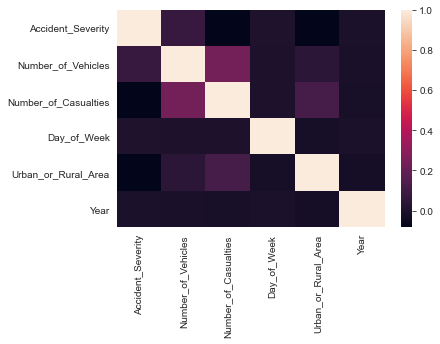

In [27]:
correlation=edited_data.corr()
print(correlation)
sns.heatmap(correlation)

### Is the Number of Vehicles Involved in a Traffic Accident Directly Proportional to the Accident Severity?

In [28]:
edited_data.groupby(['Accident_Severity'])[['Number_of_Vehicles']].mean()

,Number_of_Vehicles
Accident_Severity,
1,1.779419
2,1.681059
3,1.856551


---
# Accident Severity Estimation

In [29]:
edited_data.head()

,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Road_Type,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Year
0,2,1,1,3,Single carriageway,Raining without high winds,Wet/Damp,1,2005
1,3,1,1,4,Dual carriageway,Fine without high winds,Dry,1,2005
2,3,2,1,5,Single carriageway,Fine without high winds,Dry,1,2005
3,3,1,1,6,Single carriageway,Fine without high winds,Dry,1,2005
4,3,1,1,2,Single carriageway,Fine without high winds,Wet/Damp,1,2005


### Transforming categorical variables

In [30]:
edited_data["Road_Type"].unique()

array(['Single carriageway', 'Dual carriageway', 'One way street',
       'Roundabout', 'Slip road', 'Unknown'], dtype=object)

In [31]:
edited_data["Road_Type"]=[1 if each == "Single carriageway" else 2
                          if each == "Dual carriageway" else 3
                          if each == "One way street" else 4
                          if each == "Roundabout" else 5
                          if each == "Slip road" else 6
                          for each in edited_data["Road_Type"]]

In [32]:
edited_data["Weather_Conditions"].unique()

array(['Raining without high winds', 'Fine without high winds', 'Unknown',
       'Snowing without high winds', 'Other', 'Fine with high winds',
       'Raining with high winds', 'Fog or mist',
       'Snowing with high winds'], dtype=object)

In [33]:
edited_data["Weather_Conditions"]=[1 if each == "Raining without high winds" else 2
                          if each == "Fine without high winds" else 3
                          if each == "Unknown" else 4
                          if each == "Snowing without high winds" else 5
                          if each == "Other" else 6
                          if each == "Fine with high winds" else 7
                          if each == "Raining with high winds" else 8
                          if each == "Fog or mist" else 9         
                          for each in edited_data["Weather_Conditions"]]

In [34]:
edited_data["Road_Surface_Conditions"].unique()

array(['Wet/Damp', 'Dry', 'Frost/Ice', 'Snow',
       'Flood (Over 3cm of water)'], dtype=object)

In [35]:
edited_data["Road_Surface_Conditions"]=[1 if each == "Wet/Damp" else 2
                          if each == "Dry" else 3
                          if each == "Frost/Ice" else 4
                          if each == "Snow" else 5       
                          for each in edited_data["Road_Surface_Conditions"]]

In [36]:
edited_data.head()

,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Road_Type,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Year
0,2,1,1,3,1,1,1,1,2005
1,3,1,1,4,2,2,2,1,2005
2,3,2,1,5,1,2,2,1,2005
3,3,1,1,6,1,2,2,1,2005
4,3,1,1,2,1,2,1,1,2005


### Determining Dependent and Independent Variable

In [37]:
y = edited_data["Accident_Severity"].values #dependent variable
x = edited_data.drop(["Accident_Severity"],axis=1).values #independent variable

### Splitting  Dataset into Train and Test Sets

In [38]:
# In this project, I did not use a validation set because I was not asked to use a validation set.
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=1) # test:20% - train: 80%  
print(f"x_Train Shape: {x_train.shape}\n") 
print(f"x_Test Shape: {x_test.shape}\n") 
print(f"y_Train Shape: {y_train.shape}\n") 
print(f"y_Test Shape: {y_test.shape}") 

x_Train Shape: (1201656, 8)

x_Test Shape: (300414, 8)

y_Train Shape: (1201656,)

y_Test Shape: (300414,)


### Scaling Data

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test) 

### Training and Testing  with Models 

In [41]:
from sklearn.linear_model import LogisticRegression
LogR=LogisticRegression(solver="newton-cg",penalty="none") 
LogR.fit(X_train,y_train) 
y_pred=LogR.predict(X_test)
print(f"{y_pred}\n{y_test}\n") 

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm,"\n")

from sklearn.metrics import accuracy_score
print("Accuracy : ",accuracy_score(y_test,y_pred))

from sklearn.metrics import precision_score
print("\nPrecision : ",precision_score(y_test,y_pred,average="weighted"))

from sklearn.metrics import recall_score
print("\nRecall Score : ",recall_score(y_test,y_pred,average="weighted"))

from sklearn.metrics import f1_score 
print("\nF1 Score : ",f1_score(y_test,y_pred,average="weighted"))

[3 3 3 ... 3 3 3]
[3 3 3 ... 3 3 3]

[[    10      5   3853]
 [    13     23  40795]
 [    19     34 255662]] 

Accuracy :  0.851142090581664

Precision :  0.7781428640986304

Recall Score :  0.851142090581664

F1 Score :  0.7829954585230663


In [43]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=50,criterion="gini",random_state=1)
rfc.fit(x_train,y_train)

y_predRfc=rfc.predict(x_test)
print(y_predRfc)
print(y_test,"\n")

cm=confusion_matrix(y_test,y_predRfc)
print(cm,"\n")

print("Accuracy : ",accuracy_score(y_test,y_predRfc))


from sklearn.metrics import precision_score
print("\nPrecision : ",precision_score(y_test,y_predRfc,average="weighted"))

from sklearn.metrics import recall_score
print("\nRecall Score : ",recall_score(y_test,y_predRfc,average="weighted"))


from sklearn.metrics import f1_score 
print("\nF1 Score : ",f1_score(y_test,y_predRfc,average="weighted"))

[3 3 3 ... 3 3 3]
[3 3 3 ... 3 3 3] 

[[    29    119   3720]
 [    47    533  40251]
 [   129   1396 254190]] 

Accuracy :  0.8480030890704161

Precision :  0.7628715366294327

Recall Score :  0.8480030890704161

F1 Score :  0.78485172907288


**I might be overfitting.So to test if we are doing great or it is just overfitting,we must have another dataset to check the result.**